In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve
from collections import Counter
import seaborn as sb
import scipy.stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
import warnings
warnings.filterwarnings("ignore")

### already exported from sql and saved as csv file

In [2]:
data = pd.read_csv('sales.csv')
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


In [3]:
data.shape

(7422, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Created        7422 non-null   object 
 1   Product_ID     7364 non-null   float64
 2   Source         7405 non-null   object 
 3   Mobile         5612 non-null   object 
 4   EMAIL          7422 non-null   object 
 5   Sales_Agent    7399 non-null   object 
 6   Location       7364 non-null   object 
 7   Delivery_Mode  7422 non-null   object 
 8   Status         7422 non-null   object 
dtypes: float64(1), object(8)
memory usage: 522.0+ KB


In [5]:
data.isnull().sum()

Created             0
Product_ID         58
Source             17
Mobile           1810
EMAIL               0
Sales_Agent        23
Location           58
Delivery_Mode       0
Status              0
dtype: int64

In [6]:
data.dtypes

Created           object
Product_ID       float64
Source            object
Mobile            object
EMAIL             object
Sales_Agent       object
Location          object
Delivery_Mode     object
Status            object
dtype: object

In [7]:
data['Status'].value_counts()

Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
converted                 18
Name: Status, dtype: int64

In [8]:
data['Delivery_Mode'].value_counts()

Mode-5    2975
Mode-1    2627
Mode-3    1688
Mode-4     121
Mode-2      11
Name: Delivery_Mode, dtype: int64

In [9]:
data['Sales_Agent'].value_counts()

Sales-Agent-4     1500
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      49
Sales-Agent-1        4
Name: Sales_Agent, dtype: int64

In [10]:
data['Delivery_Mode'].unique()

array(['Mode-5', 'Mode-1', 'Mode-3', 'Mode-2', 'Mode-4'], dtype=object)

In [11]:
np.count_nonzero(data['Sales_Agent'].unique())

13

In [12]:
data['Location'].value_counts()

Other Locations    2500
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: Location, dtype: int64

In [13]:
data['Source'].value_counts()

Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Live Chat-CPC                      50
Personal Contact                   50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Youtube                   2
Other                               2
Live Chat-Quora                     2
SMS Campaign                        2
Live Chat-Justdial                  1
E-Mail Message                      1
Name: Source, dtype: int64

In [14]:
np.count_nonzero(data['Source'].unique())

26

In [15]:
data['Product_ID'].value_counts()

18.0    1711
15.0    1518
19.0    1189
9.0      992
27.0     739
5.0      487
10.0     168
1.0      105
20.0     102
25.0      90
21.0      66
2.0       38
12.0      36
26.0      31
14.0      27
11.0      12
22.0       8
6.0        7
17.0       7
3.0        7
8.0        6
13.0       5
16.0       3
24.0       3
0.0        2
23.0       2
28.0       1
7.0        1
4.0        1
Name: Product_ID, dtype: int64

## EDA

In [16]:
df = pd.DataFrame(data)

In [17]:
df.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


In [18]:
delete = ['Created','Mobile','EMAIL']
df.drop(delete,inplace = True,axis=1)
df.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,NaN,Website,Sales-Agent-11,NaN,Mode-5,Open
1,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
2,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
3,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
4,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open


In [19]:
df.isnull().sum()

Product_ID       58
Source           17
Sales_Agent      23
Location         58
Delivery_Mode     0
Status            0
dtype: int64

In [20]:
df.describe()

,Product_ID
count,7364.000000
mean,15.947311
std,6.072937
min,0.000000
25%,12.000000
50%,18.000000
75%,19.000000
max,28.000000


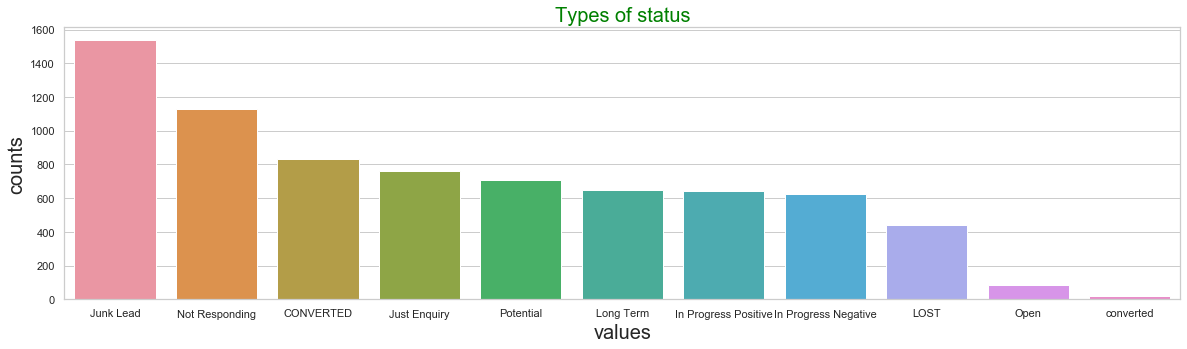

In [21]:
rcParams['figure.figsize'] = 20,5
sb.set(style='whitegrid')
sb.barplot(x = df['Status'].value_counts().index,y = df['Status'].value_counts().values,orient="v")
plt.title('Types of status',fontsize = '20',color = 'green')
plt.xlabel('values',fontsize='20')
plt.ylabel('counts',fontsize='20')
plt.show()

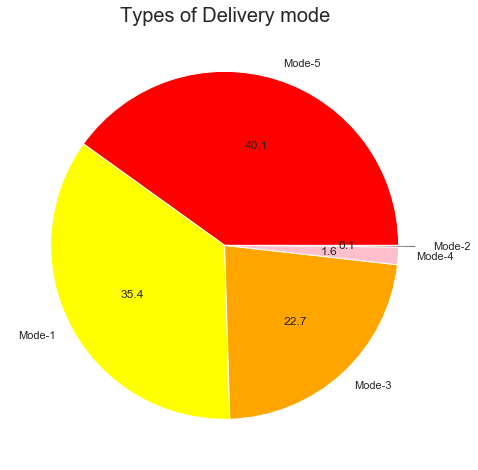

In [22]:
rcParams['figure.figsize'] = 10,8
labels = df['Delivery_Mode'].value_counts().index
values = df['Delivery_Mode'].value_counts().values
colors = ['red','yellow','orange','pink','black']
explode = [0,0,0,0,0.1]
plt.pie(values,labels=labels,colors = colors,explode=explode,autopct='%1.1f')
plt.title('Types of Delivery mode',fontsize='20')
plt.show()

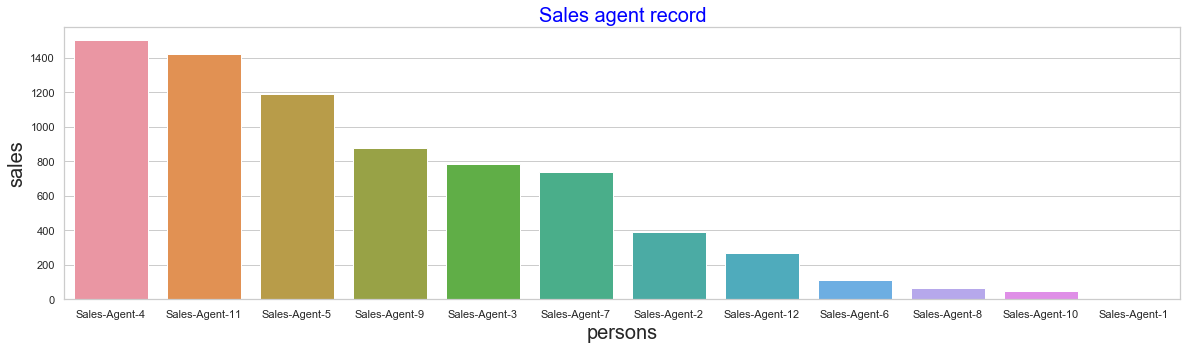

In [23]:
rcParams['figure.figsize'] = 20,5
sb.barplot(x = df['Sales_Agent'].value_counts().index,y = df['Sales_Agent'].value_counts().values)
plt.title('Sales agent record',fontsize='20',color='blue')
plt.xlabel('persons',fontsize='20')
plt.ylabel('sales',fontsize='20')
plt.show()

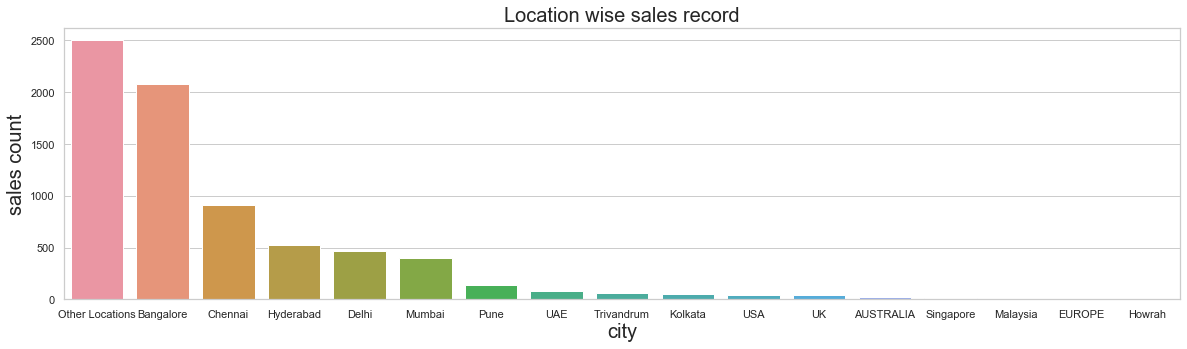

In [24]:
rcParams['figure.figsize'] = 20,5
top = sb.barplot(x = df['Location'].value_counts().index,y = df['Location'].value_counts().values)
plt.title('Location wise sales record',fontsize='20')
plt.xlabel('city',fontsize='20')
plt.ylabel('sales count',fontsize='20')
plt.show()

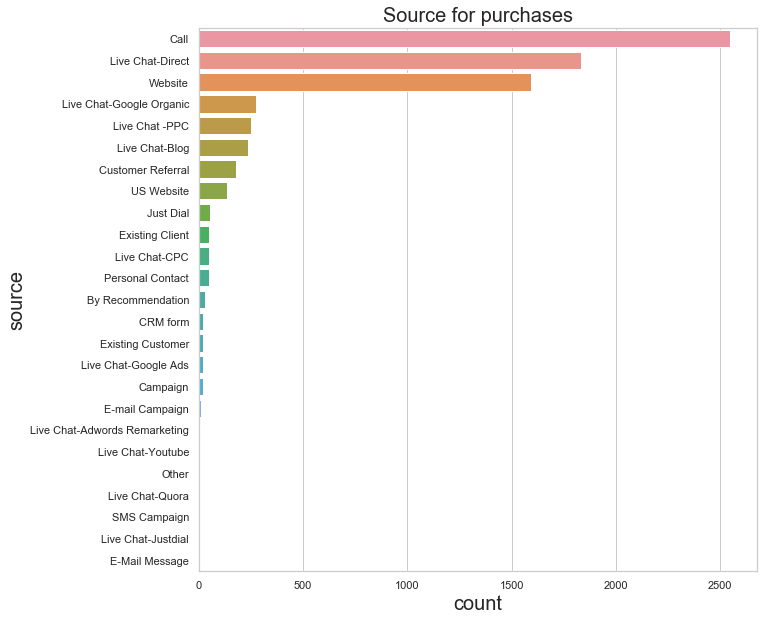

In [25]:
rcParams['figure.figsize'] = 10,10
sb.barplot(x = df['Source'].value_counts().values,y = df['Source'].value_counts().index)
plt.title('Source for purchases',fontsize='20')
plt.xlabel('count',fontsize='20')
plt.ylabel('source',fontsize='20')
plt.show()

In [26]:
sales = pd.crosstab(df.Location,df.Sales_Agent)
sales

Sales_Agent,Sales-Agent-10,Sales-Agent-11,Sales-Agent-12,Sales-Agent-2,Sales-Agent-3,Sales-Agent-4,Sales-Agent-5,Sales-Agent-6,Sales-Agent-7,Sales-Agent-8,Sales-Agent-9
Location,,,,,,,,,,,
AUSTRALIA,0,8,0,0,2,9,2,0,3,0,1
Bangalore,4,175,141,197,342,228,138,55,334,16,450
Chennai,0,208,20,40,78,207,171,11,68,8,97
Delhi,0,108,15,29,34,105,92,15,24,3,45
EUROPE,0,1,0,0,0,1,0,0,1,0,0
Howrah,0,0,0,0,0,0,1,0,0,0,0
Hyderabad,0,144,8,15,35,120,104,8,41,6,47
Kolkata,0,15,0,1,2,14,16,0,4,0,3
Malaysia,0,2,0,0,0,1,1,0,0,0,0


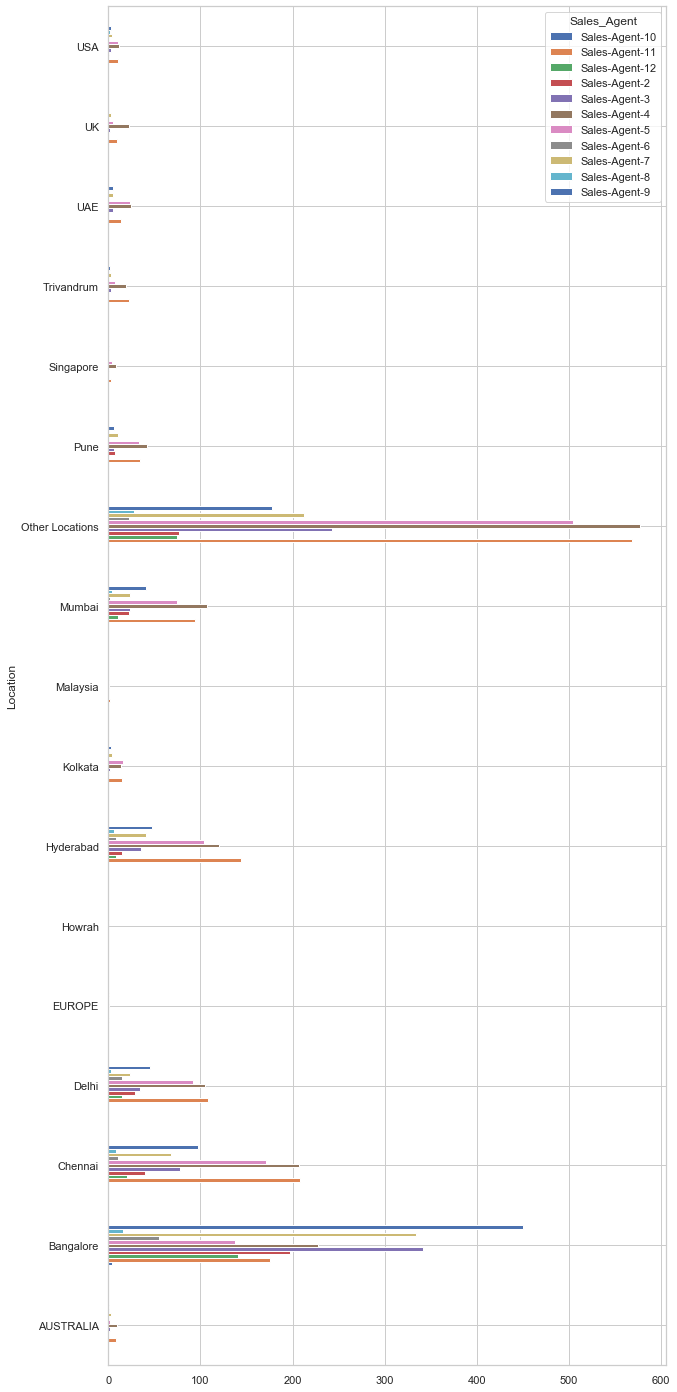

In [27]:
rcParams['figure.figsize'] = 10,25
sales.plot(kind='barh',grid=True)

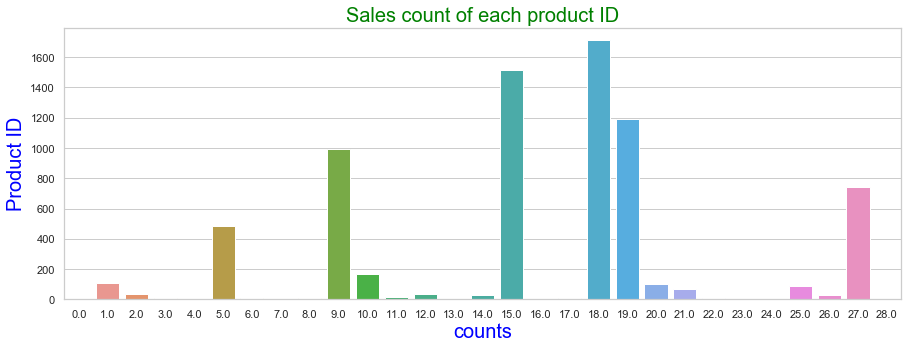

In [28]:
rcParams['figure.figsize'] = 15,5
sb.barplot(x = df['Product_ID'].value_counts().index, y = df['Product_ID'].value_counts().values)
plt.title('Sales count of each product ID',color = 'green',fontsize = '20')
plt.xlabel('counts',color = 'blue',fontsize='20')
plt.ylabel('Product ID',color = 'blue',fontsize='20')
plt.show()

## Cleaning the data

In [29]:
df.head(2)

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,NaN,Website,Sales-Agent-11,NaN,Mode-5,Open
1,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open


In [30]:
df.isnull().sum()

Product_ID       58
Source           17
Sales_Agent      23
Location         58
Delivery_Mode     0
Status            0
dtype: int64

In [31]:
df.replace('',np.nan,inplace=True)

In [32]:
df.dropna(axis=0,inplace=True)

In [33]:
df.shape

(7328, 6)

In [34]:
df.reset_index(drop=True,inplace=True)

In [35]:
df.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,9.0,Live Chat-Google Organic,Sales-Agent-3,Bangalore,Mode-1,Potential
1,19.0,Call,Sales-Agent-4,Other Locations,Mode-5,Potential
2,18.0,Website,Sales-Agent-11,Trivandrum,Mode-1,Potential
3,15.0,Website,Sales-Agent-7,Hyderabad,Mode-1,Not Responding
4,18.0,Call,Sales-Agent-7,Bangalore,Mode-1,In Progress Positive


## Modeling

In [36]:
df['Status'].unique()

array(['Potential', 'Not Responding', 'In Progress Positive',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'Open', 'LOST', 'Long Term', 'converted'], dtype=object)

In [37]:
df.Status.replace(['Potential','In Progress Positive','CONVERTED','converted','Open','Long Term'],'High Potential',inplace=True)
df.Status.replace(['Not Responding','In Progress Negative','LOST','Junk Lead','Just Enquiry'],'Low Potential',inplace=True)

In [38]:
df.Status.head()

0    High Potential
1    High Potential
2    High Potential
3     Low Potential
4    High Potential
Name: Status, dtype: object

In [39]:
df.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,9.0,Live Chat-Google Organic,Sales-Agent-3,Bangalore,Mode-1,High Potential
1,19.0,Call,Sales-Agent-4,Other Locations,Mode-5,High Potential
2,18.0,Website,Sales-Agent-11,Trivandrum,Mode-1,High Potential
3,15.0,Website,Sales-Agent-7,Hyderabad,Mode-1,Low Potential
4,18.0,Call,Sales-Agent-7,Bangalore,Mode-1,High Potential


In [40]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [41]:
cat_var = ['Source','Sales_Agent','Location','Delivery_Mode','Status']

In [42]:
for cat_var in df:
    df[cat_var] = enc.fit_transform(df[cat_var])

In [43]:
df.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,9,16,4,1,0,0
1,19,2,5,10,4,0
2,18,24,1,13,0,0
3,15,24,8,6,0,1
4,18,2,8,1,0,0


In [44]:
df.corr()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
Product_ID,1.000000,0.060910,0.006529,-0.041227,-0.036025,-0.085415
Source,0.060910,1.000000,-0.019623,0.054901,-0.151242,0.039717
Sales_Agent,0.006529,-0.019623,1.000000,-0.129056,-0.224688,-0.137074
Location,-0.041227,0.054901,-0.129056,1.000000,0.397186,0.312023
Delivery_Mode,-0.036025,-0.151242,-0.224688,0.397186,1.000000,0.220445
Status,-0.085415,0.039717,-0.137074,0.312023,0.220445,1.000000


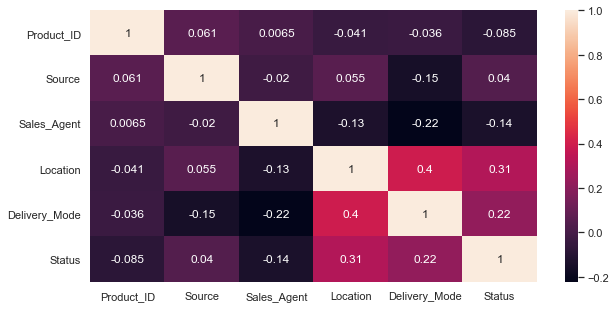

In [45]:
rcParams['figure.figsize'] = 10,5
sb.heatmap(df.corr(),annot = True)

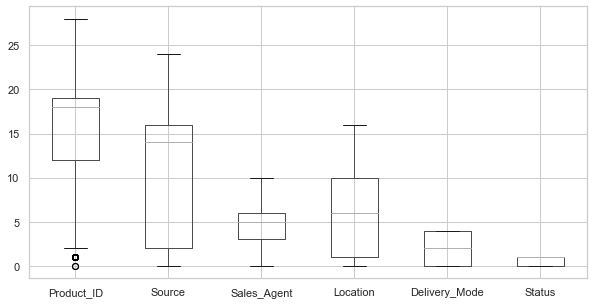

In [46]:
rcParams['figure.figsize'] = 10,5
df.boxplot()

In [47]:
X = df.iloc[:,:-1]
y = df.Status

In [48]:
X.head(2)

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
0,9,16,4,1,0
1,19,2,5,10,4


In [49]:
y.head(2)

0    0
1    0
Name: Status, dtype: int32

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [51]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split,cross_val_score,validation_curve,KFold

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 10,test_size=0.3)

In [53]:
models = []
models.append(('LG', LogisticRegression()))
models.append(('SVC', SVC()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('KNC', KNeighborsClassifier()))
models.append(('MLP', MLPClassifier()))
models.append(('XGB-TREE', XGBClassifier(booster='gbtree')))
models.append(('XGB-DART', XGBClassifier(booster='dart')))
models.append(('GNB', GaussianNB()))

In [54]:
seed = 10
results = []
names = []
output = []
score = 'accuracy'
for name,model in models:
    kfold = model_selection.KFold(n_splits = 5,random_state = seed)
    result = model_selection.cross_val_score(model,np.array(X_train),np.array(y_train),cv=kfold,scoring=score)
    results.append(result)
    names.append(name)
    values = name,result.mean()
    output.append(values)
print(output)

[('LG', 0.675961393999905), ('SVC', 0.6874636999001569), ('DTC', 0.6732334902296392), ('RFC', 0.6841536632910188), ('KNC', 0.6831752008748158), ('MLP', 0.6822020634241429), ('XGB-TREE', 0.7250935197071268), ('XGB-DART', 0.7250935197071268), ('GNB', 0.6662115722911616)]


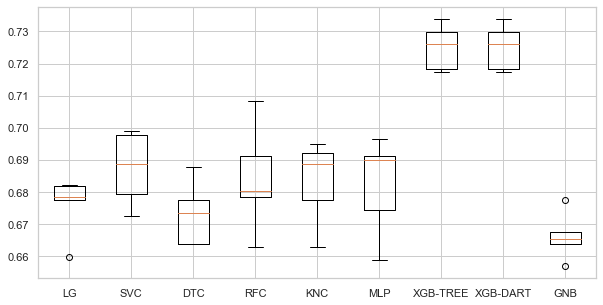

In [55]:
rcParams['figure.figsize'] = 10,5
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 10,test_size=0.3)

In [57]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [58]:
y_predict = model.predict(X_test)

In [59]:
accuracy_score(y_test,y_predict).round(4)*100

71.35000000000001

In [60]:
pd.crosstab(y_test,y_predict)

col_0,0,1
Status,,
0,466,414
1,216,1103


In [61]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.68      0.53      0.60       880
           1       0.73      0.84      0.78      1319

    accuracy                           0.71      2199
   macro avg       0.71      0.68      0.69      2199
weighted avg       0.71      0.71      0.71      2199



In [62]:
auc = roc_auc_score(y_test,y_predict)
print('XGB AUC : %.2f'%auc)

XGB AUC : 0.68


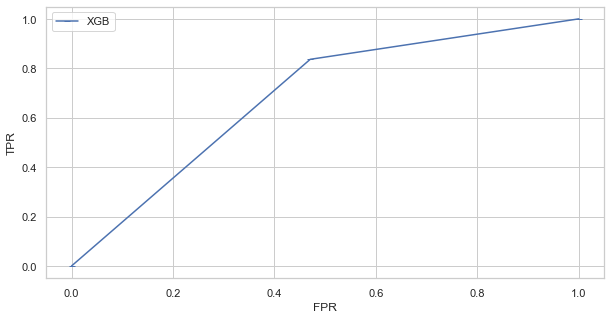

In [63]:
rf_fpr,rf_tpr,_ = roc_curve(y_test,y_predict)
plt.plot(rf_fpr,rf_tpr,marker='_',label = 'XGB')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()